Refer: Sobel Operator https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def display_img(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='grey')

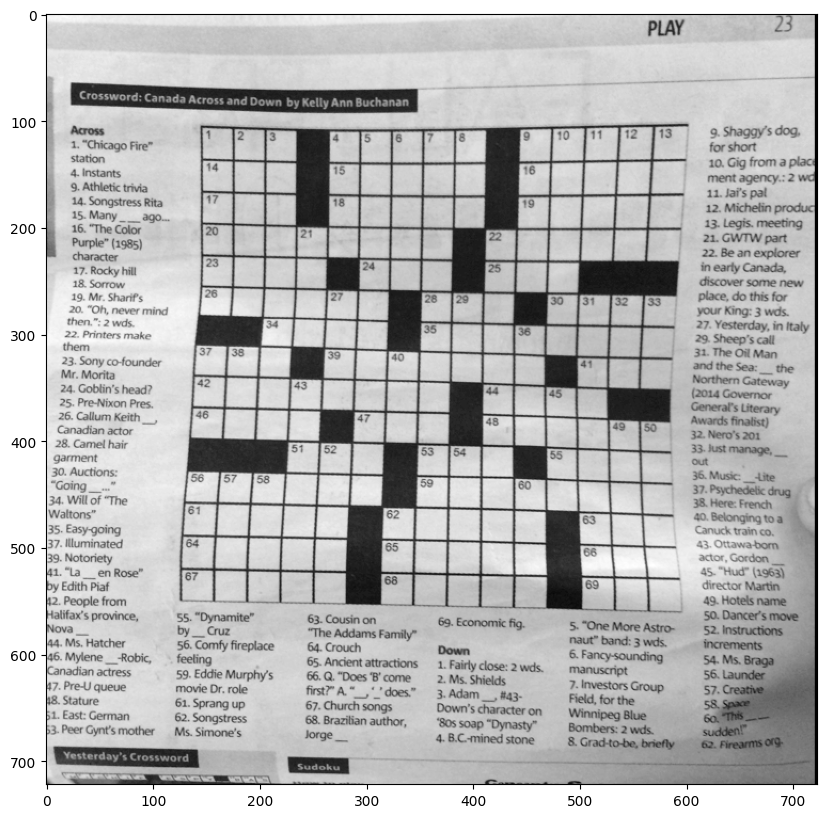

In [39]:
img = cv2.imread('Data/crossword_puzzle.png', 0) # reading image in grayscale
display_img(img)

Sobel X gradient

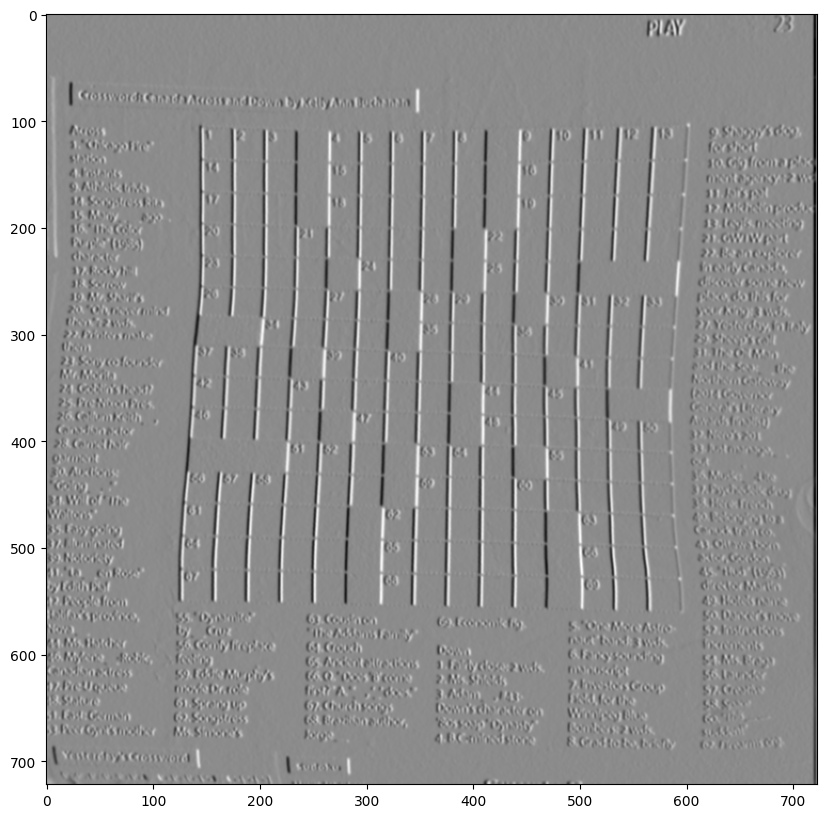

In [40]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
display_img(sobel_x) # vertical lines are very clear (as it is gradient in x-direction)

Sobel Y-gradient

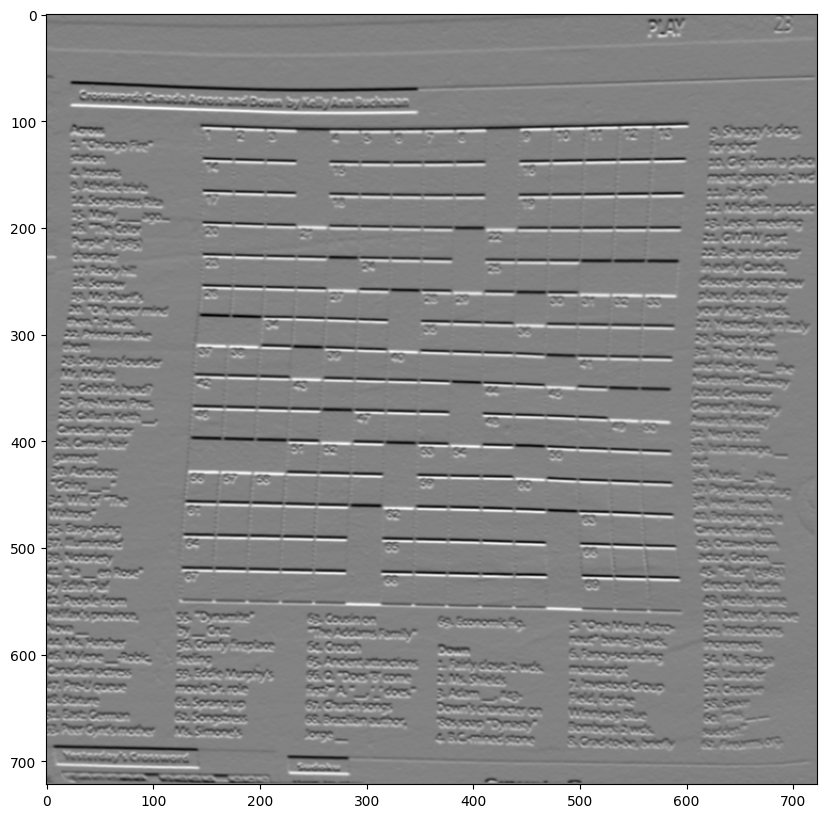

In [41]:
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
display_img(sobel_y) # Horizontal lines are very clear

Laplacian Gradient

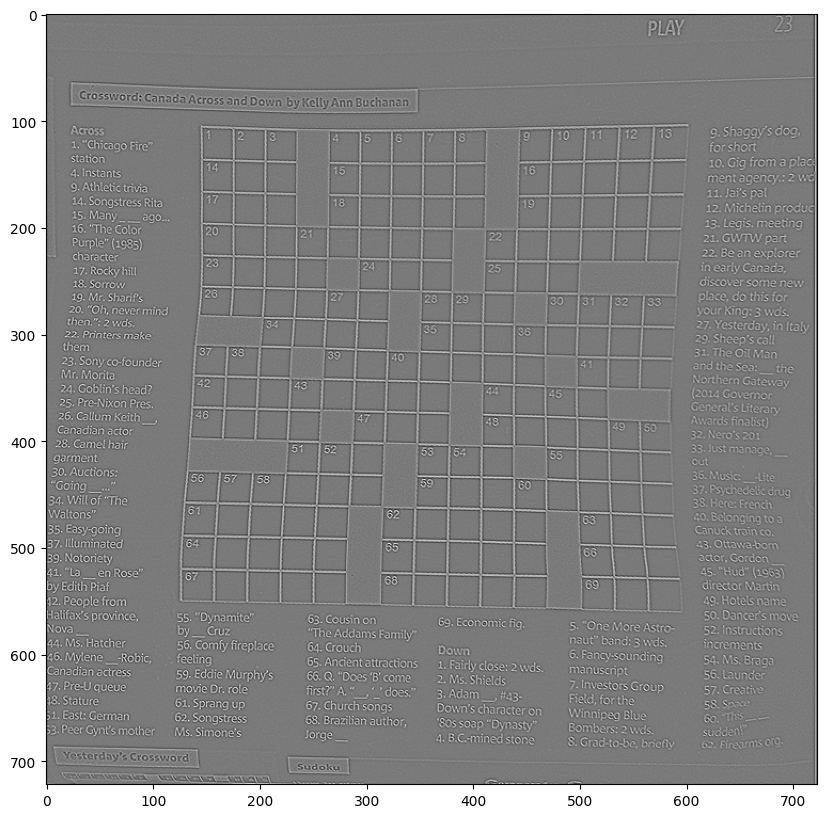

In [42]:
laplacian_grad = cv2.Laplacian(img, cv2.CV_64F)
display_img(laplacian_grad)

Blending: Blend the sobel x and y 

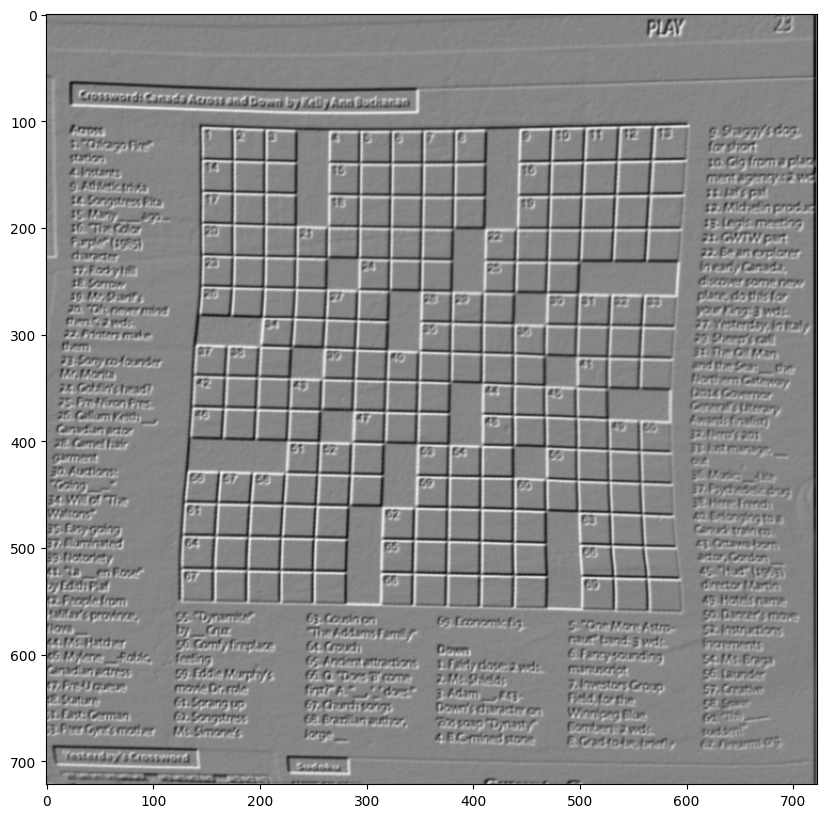

In [43]:
blended_img = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,beta=0.5, gamma=0)
display_img(blended_img)

Using morphological operator: Gradient

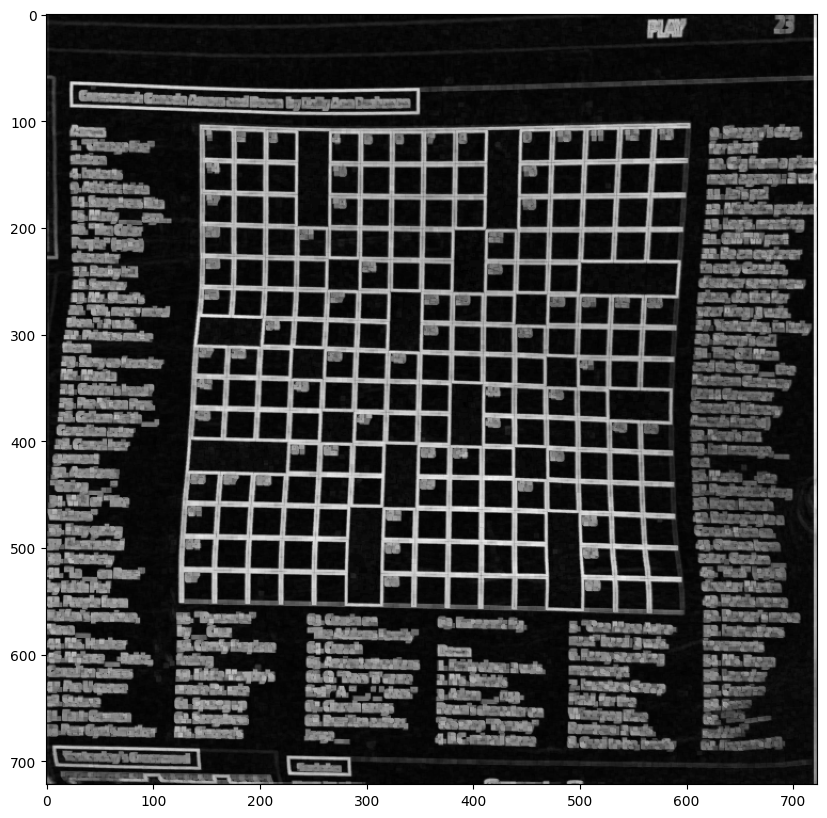

In [44]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)

Canny Edge detection

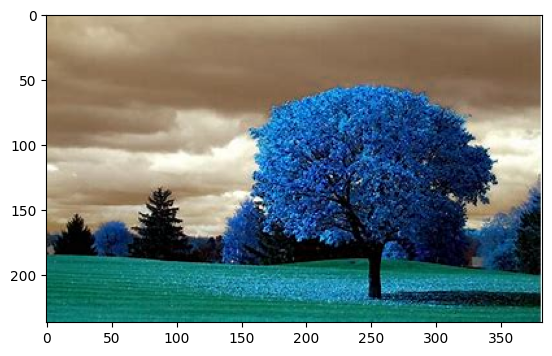

In [45]:
img = cv2.imread('Data/Tree.jpeg')
plt.imshow(img)


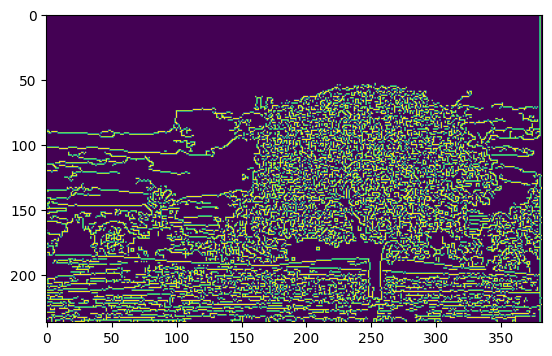

In [46]:
edges = cv2.Canny(img, 0, 127)
plt.imshow(edges)

In [47]:
median_val = np.median(img)
median_val

111.0

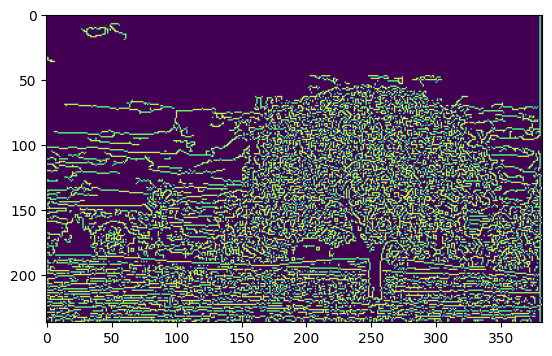

In [48]:
# Formula to setting threshold for canny edge detection
# Lower threshold
lower = int(max(0, 0.7*median_val))

# upper threshold
upper = int(min(25, 1.3*median_val))

edges = cv2.Canny(img, lower, upper)
plt.imshow(edges)

Let run Canny operator on blurred images 

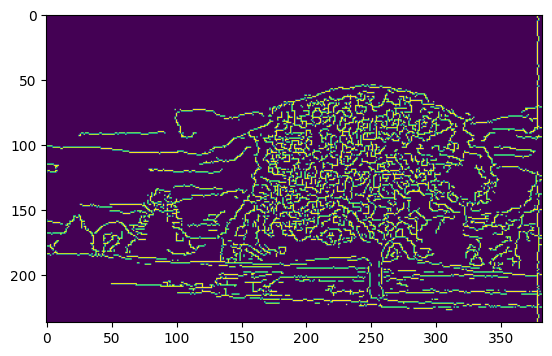

In [49]:
blurred_img = cv2.blur(img, ksize=(5,5))
edges = cv2.Canny(blurred_img, lower, upper)
plt.imshow(edges)